In [1]:
# Install required packages if needed:
# pip install pandas numpy scikit-learn matplotlib seaborn xgboost

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib


In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "European Restaurant Reviews.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "gorororororo23/european-restaurant-reviews",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df

C:\Users\USER PC\AppData\Local\Temp\ipykernel_31936\118171899.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Download already complete (673658 bytes).


,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...
...,...,...,...,...,...,...
1497,Cuba,Old Square (Plaza Vieja),Negative,The Tourism Trap,Oct 2016 •,Despite the other reviews saying that this is ...
1498,Cuba,Old Square (Plaza Vieja),Negative,the beer factory,Oct 2016 •,beer is good. food is awfull The only decent...
1499,Cuba,Old Square (Plaza Vieja),Negative,brewery,Oct 2016 •,"for terrible service of a truly comedic level,..."
1500,Cuba,Old Square (Plaza Vieja),Negative,It's nothing exciting over there,Oct 2016 •,We visited the Havana's Club Museum which is l...


In [14]:
df.isnull().sum()

Country            0
Restaurant Name    0
Sentiment          0
Review Title       0
Review Date        0
Review             0
dtype: int64

In [3]:
# Define columns
text_col = "Review"
target_col = "Sentiment"

# EDA
# Inspect columns & basic target statistics:
print(df.columns)

# Basic target stats
print(df[target_col].value_counts())
print(df[target_col].describe())

# Check missing values
print(df.isnull().sum().sort_values(ascending=False).head(20))


Index(['Country', 'Restaurant Name', 'Sentiment', 'Review Title',
       'Review Date', 'Review'],
      dtype='object')
Sentiment
Positive    1237
Negative     265
Name: count, dtype: int64
count         1502
unique           2
top       Positive
freq          1237
Name: Sentiment, dtype: object
Country            0
Restaurant Name    0
Sentiment          0
Review Title       0
Review Date        0
Review             0
dtype: int64


Accuracy: 0.9235880398671097
              precision    recall  f1-score   support

    Negative       0.88      0.66      0.75        53
    Positive       0.93      0.98      0.95       248

    accuracy                           0.92       301
   macro avg       0.90      0.82      0.85       301
weighted avg       0.92      0.92      0.92       301



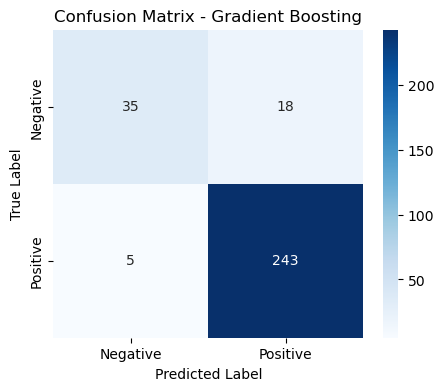

In [4]:
# 1. Import libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# 2. Define features and target
X = df["Review"]
y = df["Sentiment"]

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 5. Create Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)

# 6. Train the model
gb_model.fit(X_train_tfidf, y_train)

# 7. Predict on test data
y_pred = gb_model.predict(X_test_tfidf)

# 8. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=gb_model.classes_)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=gb_model.classes_,
    yticklabels=gb_model.classes_
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


In [30]:
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

In [31]:
#Text cleaning 
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # remove symbols
    text = re.sub(r'\s+', ' ', text)          # remove extra spaces
    return text

df["Review"] = df["Review"].apply(clean_text)


In [32]:
text_col = "Review"
target_col = "Sentiment"

X = df[text_col]
y = df[target_col]


In [33]:

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [34]:
#Converting text to numbers using TF-IDF
tfidf = TfidfVectorizer(
    max_features=15000, 
    ngram_range=(1, 3),
    stop_words='english',
    min_df=2
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [35]:
#  Feature selection
selector = SelectKBest(chi2, k=8000)
X_train_sel = selector.fit_transform(X_train_tfidf, y_train)
X_test_sel = selector.transform(X_test_tfidf)


In [36]:
#Class imbalance handling
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
weights_dict = {c: w for c, w in zip(np.unique(y_train), class_weights)}

In [38]:
# RandomizedSearchCV for Gradient Boosting
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(150, 300),
    'learning_rate': [0.05, 0.1],
    'max_depth': randint(3, 5),
    'subsample': [0.8, 1.0],
    'min_samples_leaf': [1, 3]
}

rand_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,       
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

In [42]:
#Train the model with class weights
rand_search.fit(
    X_train_sel,
    y_train,
    sample_weight=[weights_dict[i] for i in y_train]
)

print("Best Params:", rand_search.best_params_)
print("Best CV Accuracy:", rand_search.best_score_)


Best Params: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 260, 'subsample': 1.0}
Best CV Accuracy: 0.9358790523690773


In [43]:

# Final model with increased n_estimators
best_model = rand_search.best_estimator_
best_model.set_params(n_estimators=best_model.n_estimators * 2)
best_model.fit(X_train_sel, y_train)

# Evaluate
y_pred = best_model.predict(X_test_sel)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9401993355481728
              precision    recall  f1-score   support

    Negative       0.89      0.75      0.82        53
    Positive       0.95      0.98      0.96       248

    accuracy                           0.94       301
   macro avg       0.92      0.87      0.89       301
weighted avg       0.94      0.94      0.94       301



In [49]:
# =========================
# 12️⃣ Manual Test Sentences (Easy vs Hard)
# =========================
manual_sentences = [
    # Easy
    "The food was amazing and the service was excellent!",   
    "I hated the meal, it was terrible and cold.",          
    
    # Hard
    "The restaurant had good ambiance but the food was disappointing.",  
    "I expected better from such a famous place, though some dishes were nice.", 
    "Service was okay, but the waiter was rude at times."
]

true_labels = ["Positive", "Negative", "Negative", "Positive", "Negative"]

# تحويل الجمل إلى ميزات TF-IDF
manual_tfidf = tfidf.transform(manual_sentences)

# تطبيق نفس Feature Selection الذي استخدمناه في التدريب
manual_sel = selector.transform(manual_tfidf)

# التنبؤ باستخدام الموديل النهائي
manual_preds = best_model.predict(manual_sel)

# إنشاء DataFrame لتحليل النتائج
manual_df = pd.DataFrame({
    "Review": manual_sentences,
    "TrueLabel": true_labels,
    "PredictedLabel": manual_preds
})

manual_df['Correct'] = (manual_df['TrueLabel'] == manual_df['PredictedLabel']).astype(int)
manual_df['Mixed'] = [0, 0, 1, 1, 1]  # 0 = Easy, 1 = Hard

# حساب الدقة لكل نوع
easy_acc = manual_df[manual_df['Mixed']==0]['Correct'].mean()*100
hard_acc = manual_df[manual_df['Mixed']==1]['Correct'].mean()*100

print(f"\nAccuracy on Easy Sentences: {easy_acc:.1f}%")
print(f"Accuracy on Hard Sentences: {hard_acc:.1f}%")



Accuracy on Easy Sentences: 100.0%
Accuracy on Hard Sentences: 33.3%


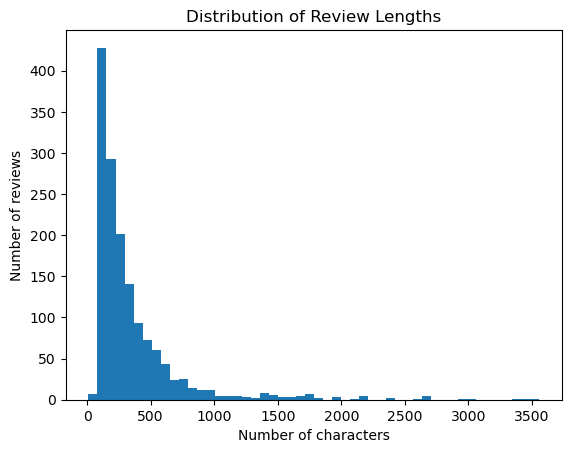

In [51]:
import matplotlib.pyplot as plt

df['ReviewLength'] = df['Review'].apply(len)
plt.hist(df['ReviewLength'], bins=50)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of characters")
plt.ylabel("Number of reviews")
plt.show()


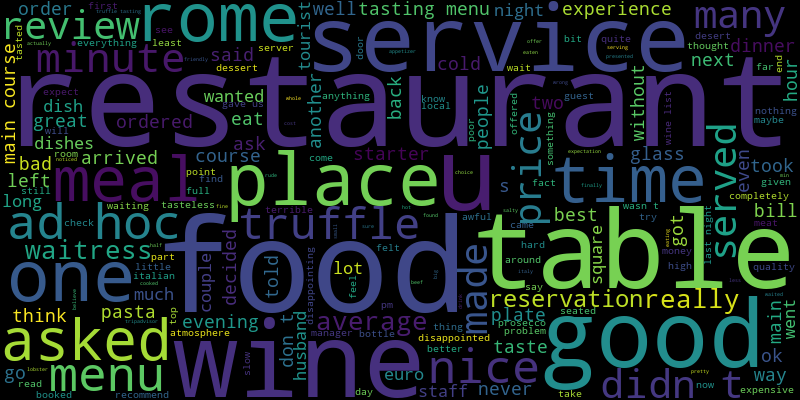

In [52]:
from wordcloud import WordCloud

pos_text = " ".join(df[df['Sentiment']=='Positive']['Review'])
neg_text = " ".join(df[df['Sentiment']=='Negative']['Review'])

WordCloud(width=800, height=400).generate(pos_text).to_image()
WordCloud(width=800, height=400).generate(neg_text).to_image()


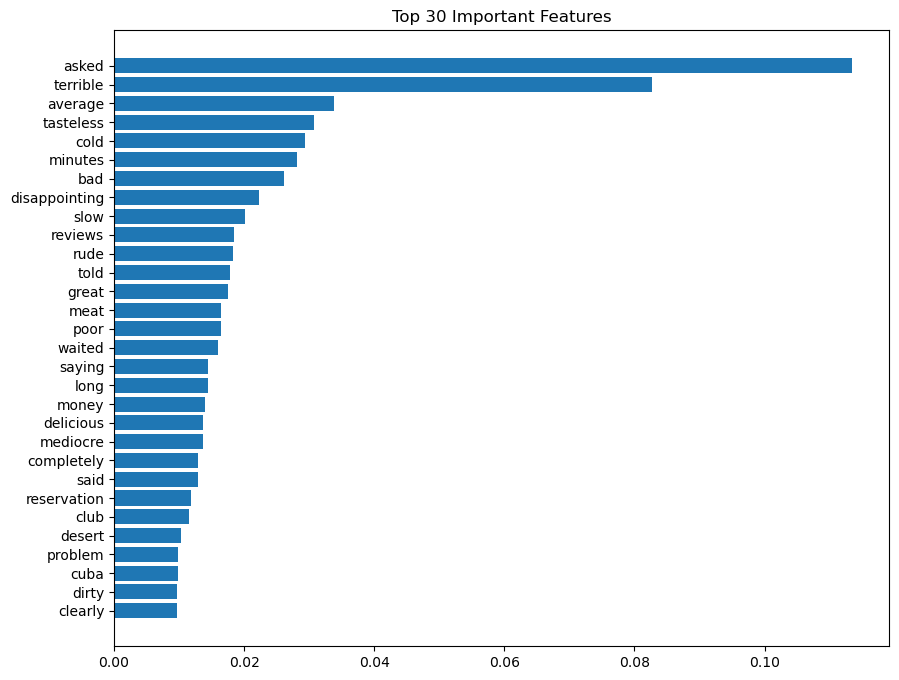

In [53]:
#Feature Importance

importances = best_model.feature_importances_
indices = np.argsort(importances)[-30:]
plt.figure(figsize=(10,8))
plt.barh(range(30), importances[indices], align='center')
plt.yticks(range(30), np.array(tfidf.get_feature_names_out())[selector.get_support()][indices])
plt.title("Top 30 Important Features")
plt.show()


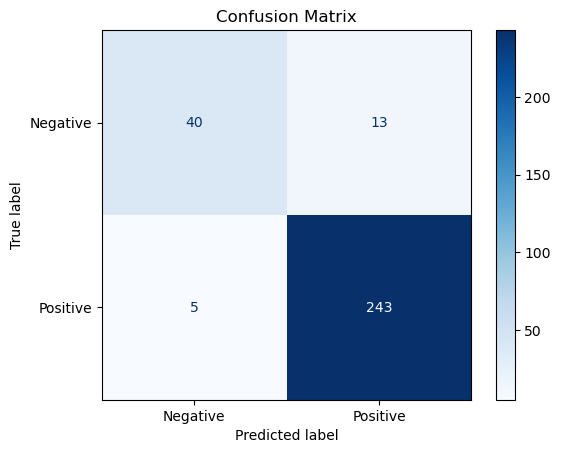

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [57]:
errors = pd.DataFrame({
    'Review': X_test,
    'True': y_test,
    'Predicted': y_pred
})
errors = errors[errors['True'] != errors['Predicted']]
print(errors.head(10))


                                                 Review      True Predicted
87    how this is ranked the restaurant in rome i wi...  Negative  Positive
14    we both ate the truffle tasting menu with wine...  Negative  Positive
1374  we visited the th century plaza vieja which is...  Positive  Negative
1050  i did not even enter this restaurant i will no...  Negative  Positive
1472  another square or piazza you will cross many t...  Negative  Positive
21    had the truffle tasting and it tasted flat def...  Negative  Positive
1206  food was pretty good but everything took ages ...  Negative  Positive
844   we went to the new year s eve dinner and the f...  Negative  Positive
1477  very disappointing as all the waiters and wait...  Negative  Positive
1055  i would recommend you to try dumpling in hong ...  Negative  Positive


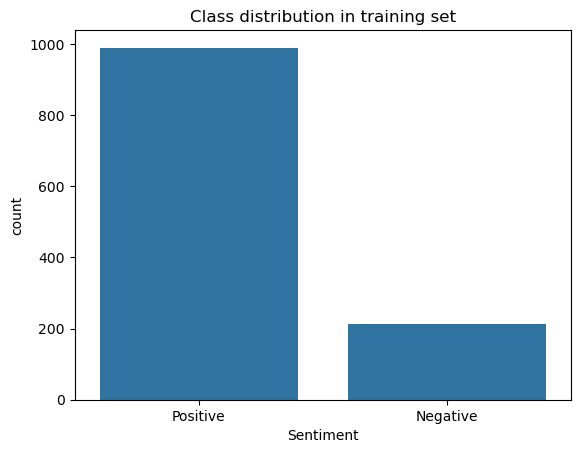

In [58]:
sns.countplot(x=y_train)
plt.title("Class distribution in training set")
plt.show()


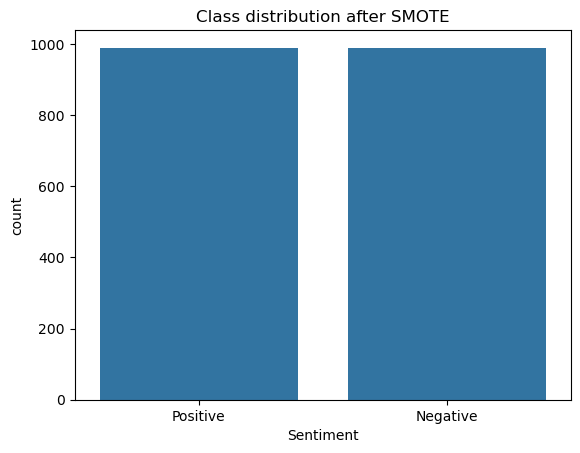

In [63]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_sel, y_train)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_res)
plt.title("Class distribution after SMOTE")
plt.show()

In [65]:
# استخراج الأعمدة الرقمية فقط (TF-IDF)
tfidf_features = tfidf_df.drop(columns=['Sentiment'])

# جمع قيم كل كلمة لكل فئة
top_pos = tfidf_features[tfidf_df['Sentiment']=='Positive'].sum().sort_values(ascending=False).head(20)
top_neg = tfidf_features[tfidf_df['Sentiment']=='Negative'].sum().sort_values(ascending=False).head(20)

print("Top Positive words:\n", top_pos)
print("Top Negative words:\n", top_neg)


Top Positive words:
 great         35.580110
food          35.340251
good          33.894343
service       31.224168
place         25.705748
nice          23.445911
restaurant    20.914695
excellent     19.001265
staff         18.904149
delicious     18.780611
amazing       18.735733
friendly      18.499244
really        17.237359
atmosphere    15.696081
recommend     15.165572
menu          15.022996
beer          14.664268
wine          14.563910
lovely        14.476817
best          14.438253
dtype: float64
Top Negative words:
 restaurant     6.165519
food           6.110390
table          5.486412
wine           5.285334
good           4.518890
just           4.493642
service        4.483090
menu           4.133666
truffle        4.061690
rome           4.046881
didn           4.007849
place          3.985507
asked          3.700088
did            3.548527
like           3.517832
reservation    3.440285
square         3.415311
terrible       3.386608
minutes        3.376366
told   

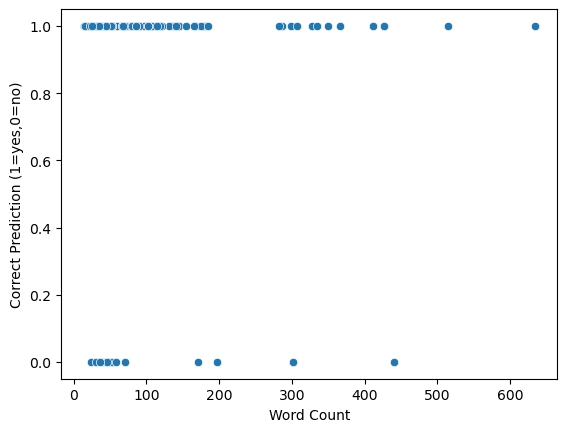

In [62]:
X_test_len = X_test.apply(len)
X_test_word_count = X_test.apply(lambda x: len(x.split()))

sns.scatterplot(x=X_test_word_count, y=(y_test==y_pred).astype(int))
plt.xlabel("Word Count")
plt.ylabel("Correct Prediction (1=yes,0=no)")
plt.show()
